# Pymaceuticals Inc.
---

### Analysis

- Tumors sizes for mice treated with Capomulin were reduced by fifty percent over a course of 40+ days of treatment. 
- Mice had a positive correlation between mouse weight and tumor volume. The greater the weight of the mouse the greater the    volumne of the tumor was on average.
- The data has a bias towards certain drugs as not all drugs were given visualizaiton. The data's results are limited to the visualization provided in the code below. 
- The mean size of the tumor volume (mm3) of 80% of the population tested was within 2 mm3 of the placebo. 

 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mergdf = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
mergdf.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [66]:
# Checking the number of mice.
# Display the total number of mice (including duplicates)
print("Total number of mice (including duplicates): ", len(mergdf['Mouse ID']))
# Display the number of unique mice IDs in the data
print("Number of unique mice IDs in the original data: ", mergdf['Mouse ID'].nunique())


Total number of mice (including duplicates):  1893
Number of unique mice IDs in the original data:  249


In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmice = mergdf[mergdf.duplicated(['Mouse ID', 'Timepoint'])]
dupmice



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
numdup = dupmice['Mouse ID'].unique()
numdup


array(['g989'], dtype=object)

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data = mergdf[mergdf['Mouse ID'].isin(numdup)]

all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cclean = mergdf[~mergdf['Mouse ID'].isin(numdup)]
#cleandf = cclean.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

cclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [71]:
cleandf = cclean.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleandf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
# Checking the number of mice in the clean DataFrame.


In [72]:
# Checking the number of mice in the clean DataFrame.
total_clean = cleandf['Mouse ID'].nunique()
print("Number of unique mice in the cleaned DataFrame: ", total_clean)

Number of unique mice in the cleaned DataFrame:  248


## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.




In [84]:
# Display the summary statistics table
summary_stats = cclean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cclean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

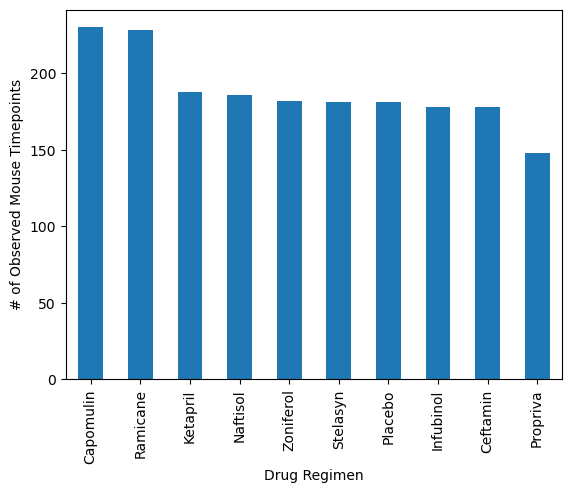

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


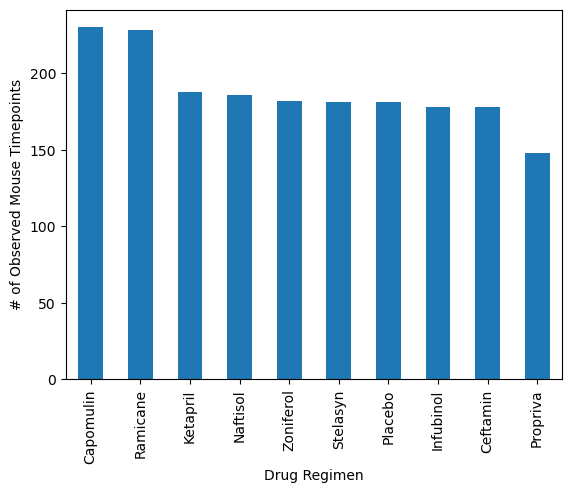

In [77]:
# Count the number of rows for each drug regimen
counts = cclean['Drug Regimen'].value_counts()

# Generate a bar plot
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

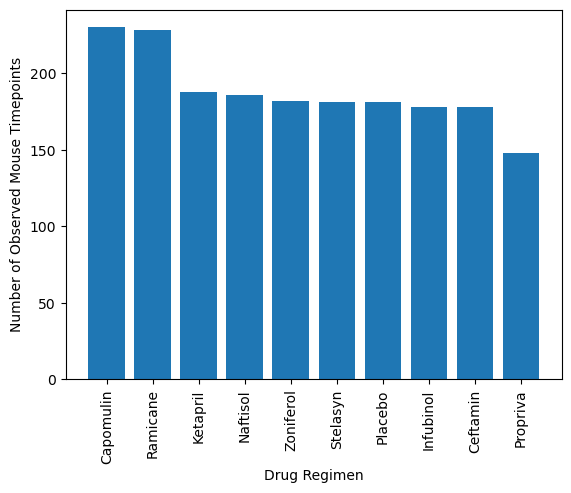

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

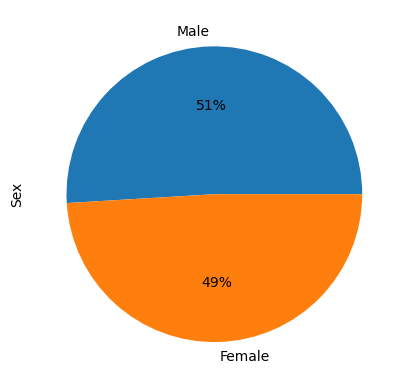

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
counts = cclean['Sex'].value_counts()

# Generate a pie plot
counts.plot(kind='pie', autopct='%1.0f%%')

# Display the plot
plt.show()


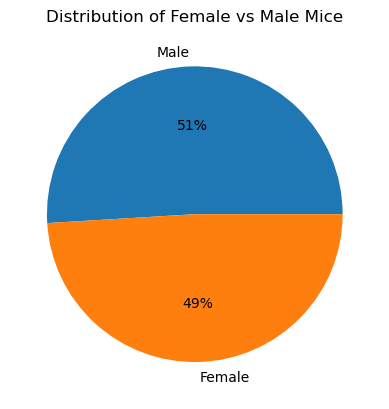

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index, autopct='%1.0f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
from scipy.stats import iqr
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cclean.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergdf_last = pd.merge(cclean, last_timepoint, on=['Mouse ID', 'Timepoint'])

In [88]:


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mergdf_last.loc[mergdf_last['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_val = iqr(final_tumor_vol)
    
    print(f"For {treatment}, Interquartile Range (IQR) is {iqr_val}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr_val)
    upper_bound = upperq + (1.5*iqr_val)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"For {treatment}, values below {lower_bound} and above {upper_bound} could be outliers.")
    print(f"The potential outliers for {treatment} are: {outliers}\n")

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 and above 51.83201549 could be outliers.
The potential outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 and above 54.30681135 could be outliers.
The potential outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 and above 82.74144559000001 could be outliers.
The potential outliers for Infubinol are: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 and above 87.66645829999999 could be outliers.
The potential outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)



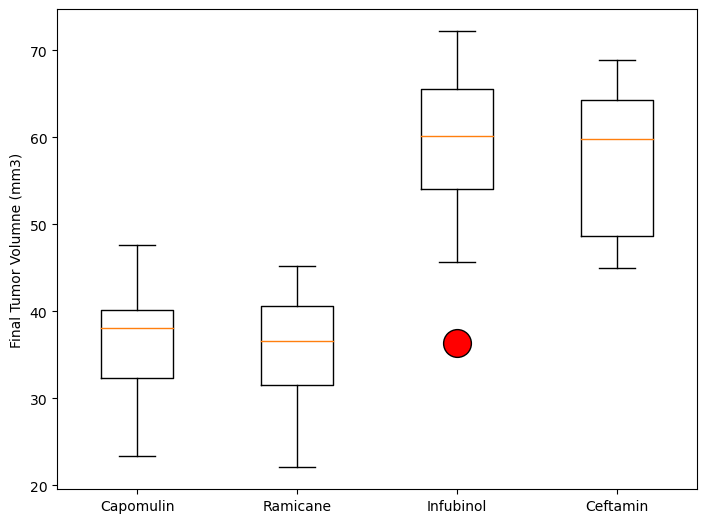

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(tumor_vol_data, labels=treatments)
for i in range(len(bp['fliers'])):
    bp['fliers'][i].set(markerfacecolor='red', markersize=20)
    
plt.ylabel('Final Tumor Volumne (mm3)')
plt.show()



In [20]:
print(len(tumor_vol_data))  # Should print 4 if there are 4 treatments
for data in tumor_vol_data:
    print(len(data))  # Should print the number of data points for each treatment

4
25
25
25
25


## Line and Scatter Plots

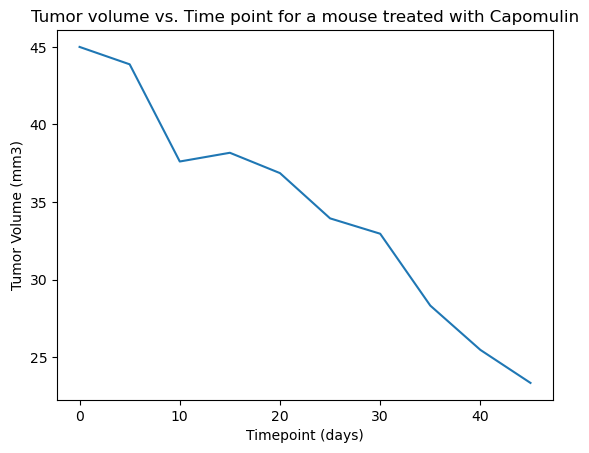

In [63]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin# Gene
# Filter the data for a single mouse treated with Capomulin
mouse_data = mergdf[(mergdf['Drug Regimen'] == 'Capomulin') & (mergdf['Mouse ID'] == 's185')]  # Replace 's185' with your mouse ID

# Generate the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add labels and title to the plot
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume vs. Time point for a mouse treated with Capomulin')

# Display the plot
plt.show()

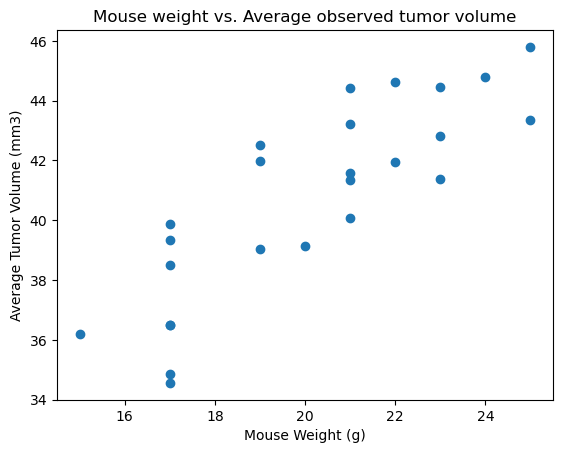

In [59]:
# Generate a scatter plot of mpomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Filter the data for Capomulin regimen
capomulin_data = mergdf[mergdf['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Add labels and title to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs. Average observed tumor volume')

# Display the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.841936342469472


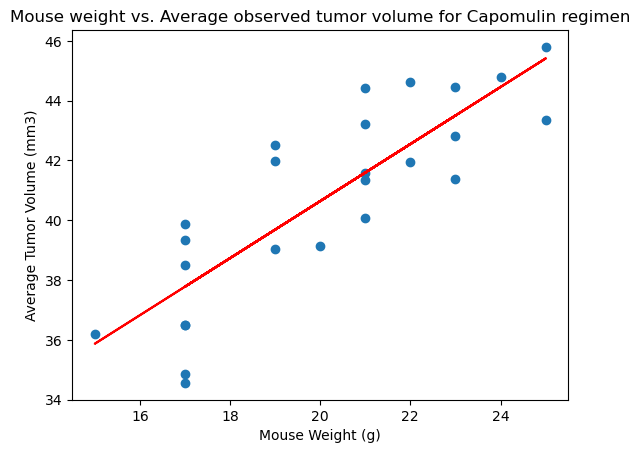

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight, average_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs. Average observed tumor volume for Capomulin regimen')

# Display the plot
plt.show()